In [1]:
# basic imports:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

### 1.  Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

### 2.  Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

#### Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [6]:
# establish a datetime index

In [7]:
# convert the date to a datetime
df.loc[:,'Date'] = pd.to_datetime(df.Date)

# reassign the index
df = df.set_index('Date')

df.head()

/var/folders/ct/1cglvbws6mg5nbhlr6gvzq180000gn/T/ipykernel_55944/1261659015.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Date'] = pd.to_datetime(df.Date)


,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [8]:
# add month column to help in capture of seasonal trends
df['month'] = df.index.month_name()
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   month        365 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


Spread of data for Temperature


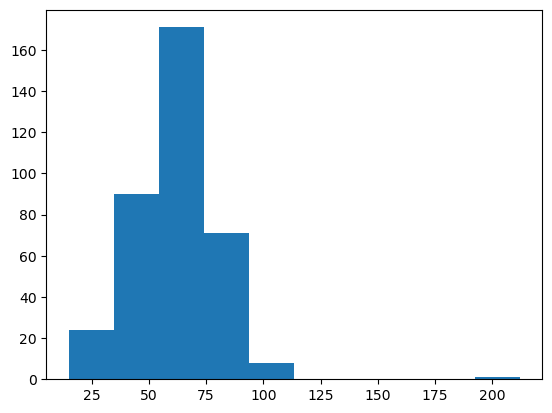

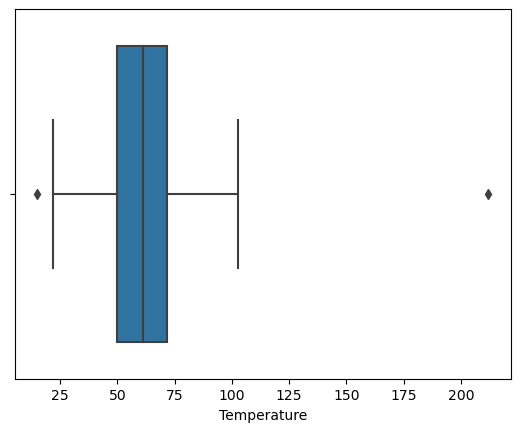

Spread of data for Rainfall


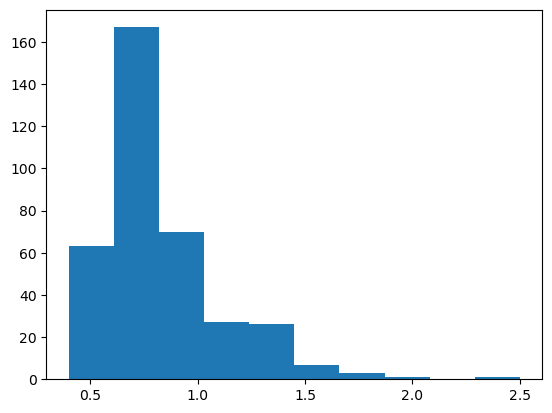

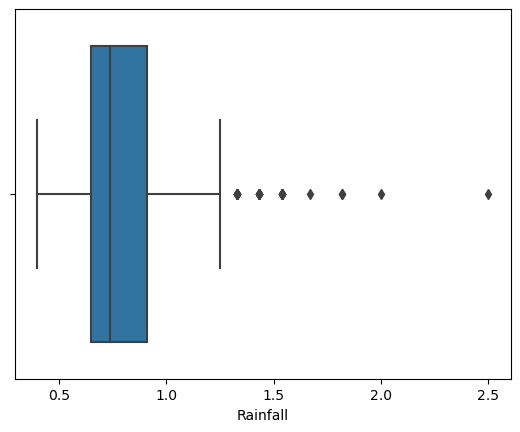

Spread of data for Flyers


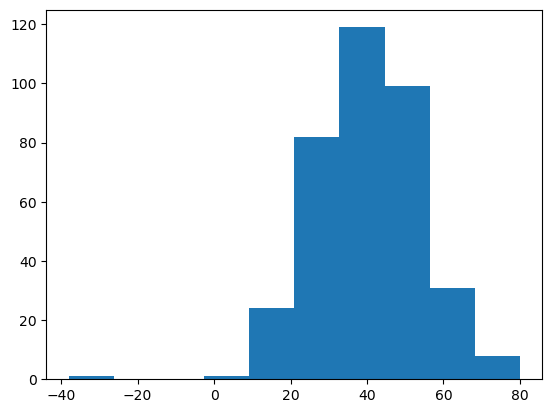

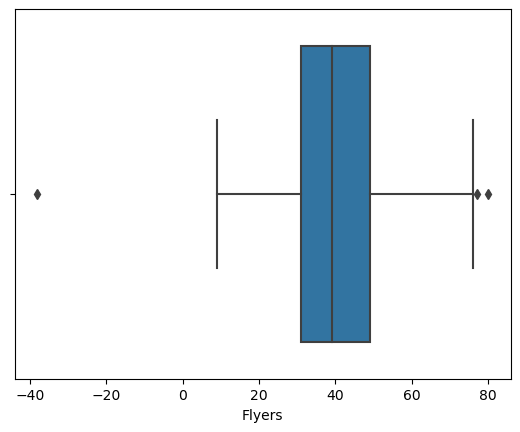

Spread of data for Price


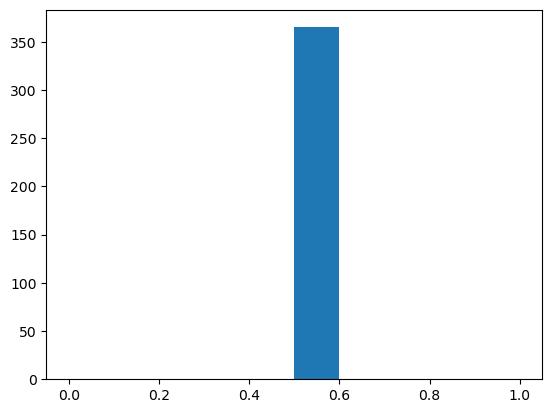

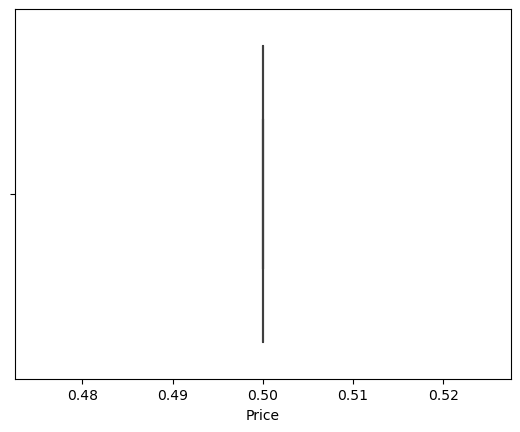

Spread of data for Sales


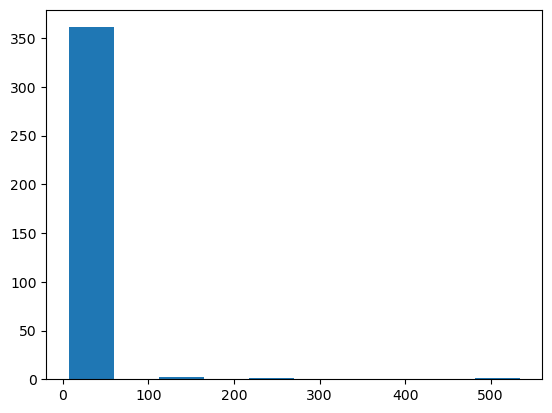

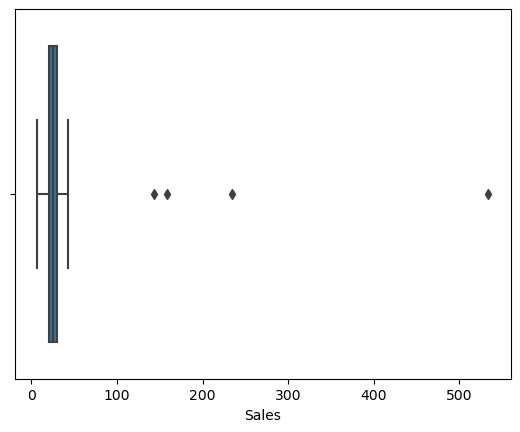

In [13]:
# plot the spread of information, excluding object datatype columns

for col in df.drop(columns=['month','Day']).columns:
    print(f'Spread of data for {col}')
    # make a histogram for each col
    plt.hist(df[col])
    plt.show()
    # make a box plot of each col
    sns.boxplot(data=df, x=col)
    plt.show()
    print('===========')

In [16]:
# function to calculate outliers

def get_fences(df, col, k=1.5):
    q1, q3 = df[col].quantile(0.25), \
    df[col].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + k*iqr
    lower_fence = q1 - k*iqr
    return lower_fence, upper_fence

In [17]:
# put all the values into a dictionary for organizational purposes
# k=1.5

outliers_dict = {}
for col in df.drop(columns=['month','Day']).columns:
    outliers_dict[col] = {}
    outliers_dict[col]['bounds'] = get_fences(df,col)
    outliers_dict[col]['df'] = \
    df[(df[col] > outliers_dict[col]['bounds'][1])|
      (df[col] < outliers_dict[col]['bounds'][0])]

In [19]:
df.columns

Index(['Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales', 'month'], dtype='object')

In [18]:
outliers_dict.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [20]:
outliers_dict['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [21]:
for col in outliers_dict.keys():
    print(f'Outliers for {col}:')
    print(outliers_dict[col]['df'].to_markdown())
    print(f"Bounds: {outliers_dict[col]['bounds']}")
    print('=====================')

Outliers for Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |
Bounds: (16.700000000000003, 104.7)
Outliers for Rainfall:
| Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 

In [ ]:
# takeaways from 1.5 IQR examination:
    # high sales numbers are all in July, with the highest spike at July 4th 
    # (independence day holiday)
    # Rainy days all appear to be in December and January, appears to be a consistently rainy season
    # low temp in winter as an outlier on new years, check to see weather around that date
    # feb temp not getting to 212
    # check flyer date with negative value, see if we can fix that.

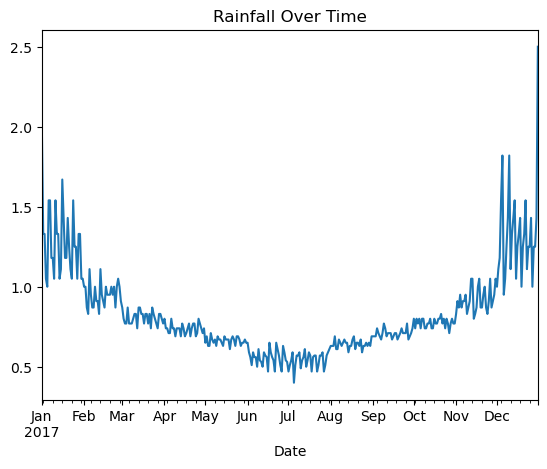

In [22]:
df['Rainfall'].plot(title='Rainfall Over Time')
plt.show()

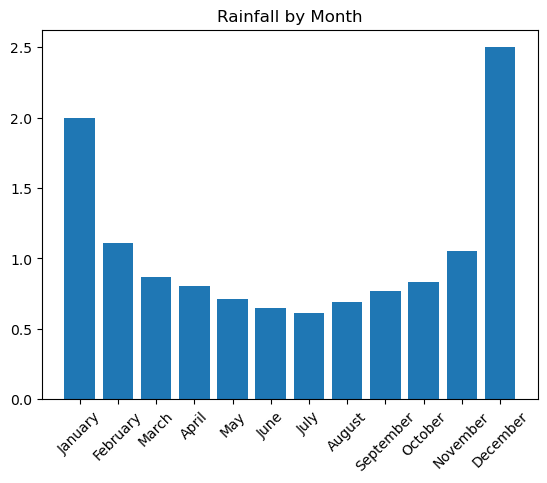

In [26]:
plt.bar(df.month, df.Rainfall)
plt.title('Rainfall by Month')
plt.xticks(rotation=45)
plt.show()

In [27]:
# put all the values into a dictionary for organizational purposes
# k=3
outliers_dict_3 = {}
for col in df.drop(columns=['month','Day']).columns:
    outliers_dict_3[col] = {}
    outliers_dict_3[col]['bounds'] = get_fences(df,col,k=3.0)
    outliers_dict_3[col]['df'] = \
    df[(df[col] > outliers_dict_3[col]['bounds'][1])|
      (df[col] < outliers_dict_3[col]['bounds'][0])]

In [28]:
for col in outliers_dict_3.keys():
    print(f'Outliers for {col}:')
    print(outliers_dict_3[col]['df'].to_markdown())
    print(f"Bounds: {outliers_dict_3[col]['bounds']}")
    print('=====================')

Outliers for Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
Bounds: (-16.299999999999997, 137.7)
Outliers for Rainfall:
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9

In [29]:
outliers_dict['Rainfall'].keys()

dict_keys(['bounds', 'df'])

In [31]:
#  z scores:

col = 'Rainfall'
for col in outliers_dict.keys():
    outliers_dict[col]['zdf'] = \
    df[((df[col] - (df[col].mean())) / df[col].std()).abs() > 3] 

In [32]:
outliers_dict['Rainfall'].keys()

dict_keys(['bounds', 'df', 'zdf'])

In [33]:
for col in outliers_dict.keys():
    print(f'For {col}:')
    print(outliers_dict[col]['zdf'].to_markdown())
    print('===========')

For Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
For Rainfall:
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-16 00:00:00 | Monday  |          30.6 |       1.67 |       24 |     0.5 |      12 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00

In [34]:
col = 'Rainfall'
for col in outliers_dict.keys():
    outliers_dict[col]['zdf'] = \
    df[((df[col] - (df[col].mean())) / df[col].std()).abs() > 2] 

In [35]:
for col in outliers_dict.keys():
    print(f'For {col}:')
    print(outliers_dict[col]['zdf'].to_markdown())
    print('===========')

For Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-06-16 00:00:00 | Friday   |          99.3 |       0.47 |       77 |     0.5 |      41 | June     |
| 2017-06-26 00:00:00 | Monday   |         102.6 |       0.47 |       60 |     0.5 |      42 | June     |
| 2017-07-01 00:00:00 | Saturday |         102.9 |       0.47 |       59 |     0.5 |     143 | July     |
| 2017-07-10 00:00:00 | Monday   |          98   |       0.49 |       66 |     0.5 |      40 | July     |
| 2017-07-18 00:00:00 | Tuesday  |          99.3 |       0.47 |       76 |     0.5 |      41 | July     |
| 2017-07-22 00:00:00 | Saturday |          99.6 |       0.47 |       49 |     0.5 |      42 | July     |
| 2017-07-27 00:00:00 | Thurs

In [39]:
# reassign the temp value for 02/11 for temperature to the mean of the day before and the day after

df.loc['2017-02-11','Temperature'] = (df.loc['2017-02-10']['Temperature'] + df.loc['2017-02-12']['Temperature']) / 2

Spread of data for Temperature


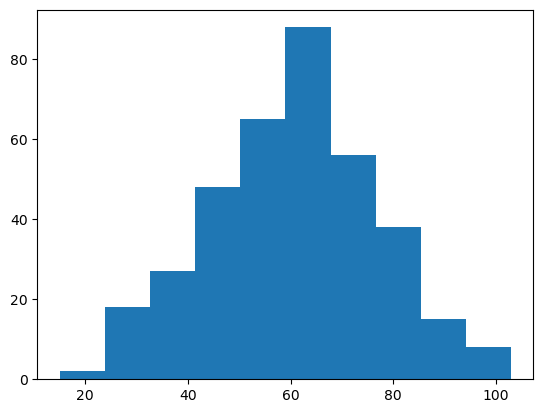

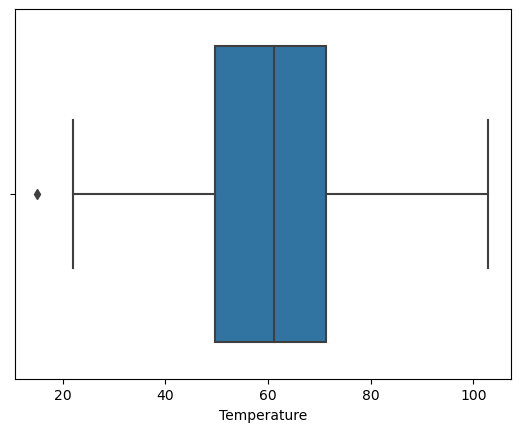

Spread of data for Rainfall


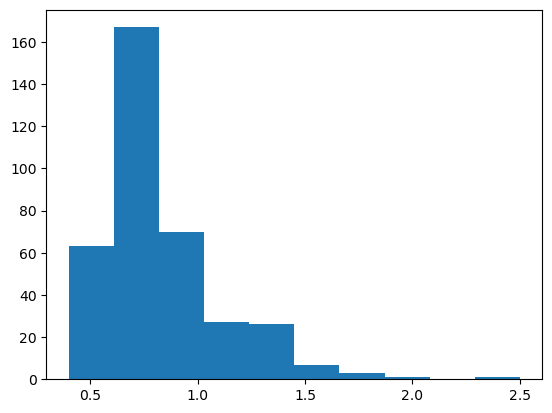

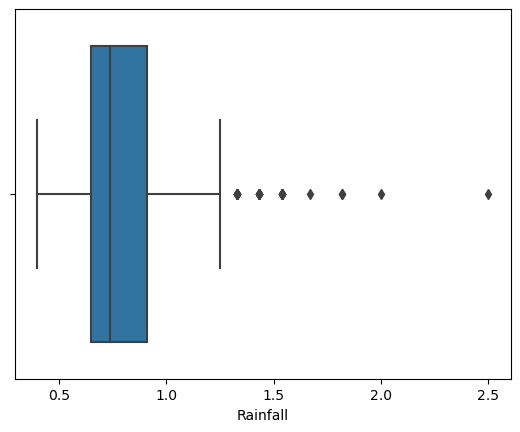

Spread of data for Flyers


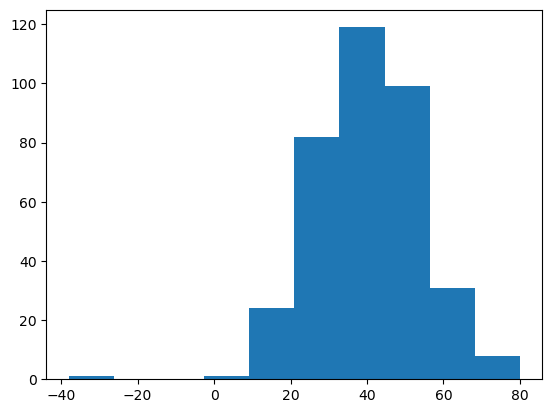

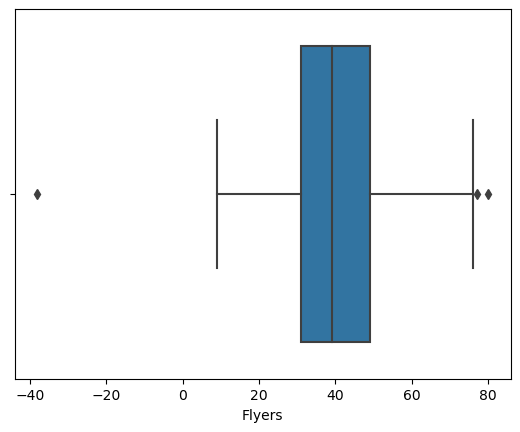

Spread of data for Price


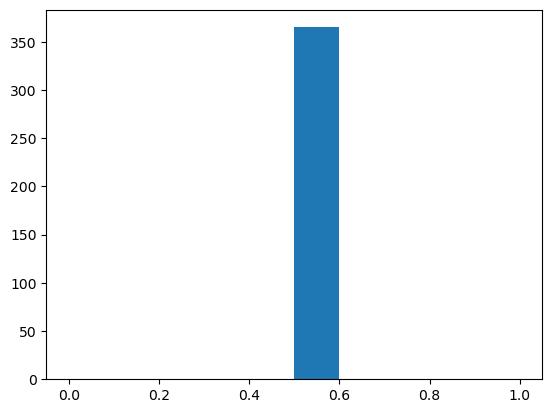

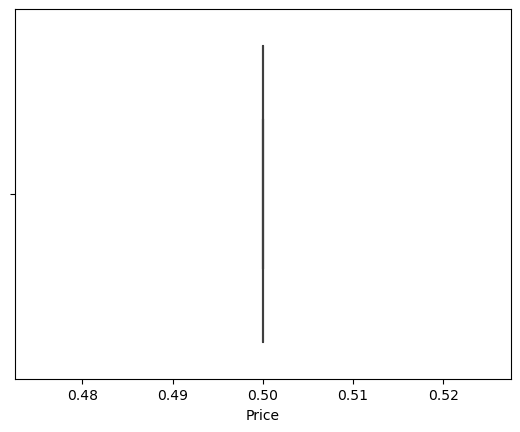

Spread of data for Sales


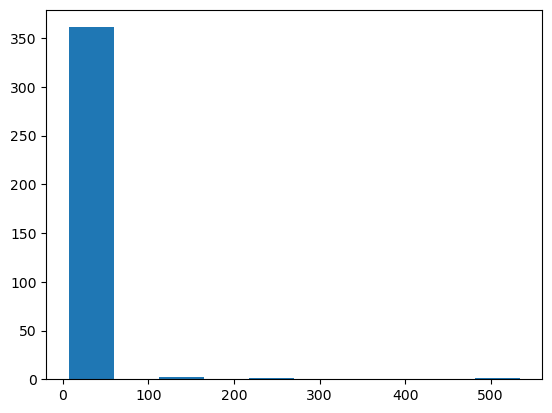

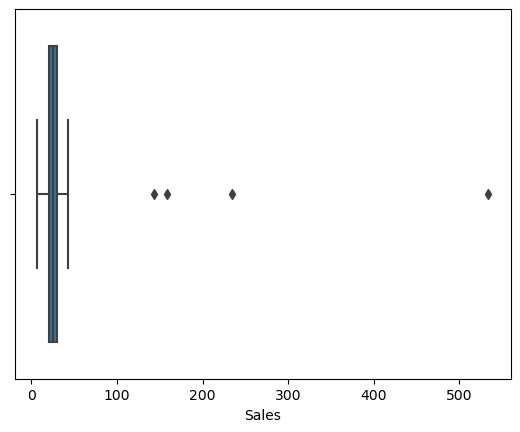

In [40]:
for col in df.drop(columns=['month','Day']).columns:
    print(f'Spread of data for {col}')
    # make a histogram for each col
    plt.hist(df[col])
    plt.show()
    # make a box plot of each col
    sns.boxplot(data=df, x=col)
    plt.show()
    print('===========')

### Summary

- We have located instances of our data that appeared as aberrant or weird in some way.
- We defined these by IQR, domain context, and z-score
- We used critical thinking in order to impute and patch clerical errors in the data as well as gaining a sense of seasonality for both weather and sales